In [1]:
# required stuff
import sys
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/thermal')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/aqueous')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/transport')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/rock')
sys.path.insert(1, '/Users/samuelcourville/Documents/JPL/combinedModel/tables')
import matplotlib.pyplot as plt
import numpy as np

# 1). Import WOW!

In [2]:
# import WOW (WOW! Ocean Worlds)
import WOW

# 2). Create model grid

In [3]:
######### define grid ##############

nr = 51       # Number of radii
maxnt = 2000  # Maximum number of time steps

YR = 3.1536E7            #(Year to seconds conversion)
StartTime=3.0*10**6*YR   # Myrs
EndTime = 4567*10**6*YR  # Myrs. Stop time if maxnt is not reached Myr
Radius = 580000          # meters

# parameters for perplex grid
temp_step = 25 # how many degrees temperature difference before recalculating thermal properties? 
press_step= 10 # how many radius points between each perplex equilibration calculation

Ceres = WOW.Planet(nr,StartTime,EndTime,Radius,maxnt,temp_step,press_step)

# 3). Initialize model composition

### 3a starting temperature

In [4]:
# Starting temperature
init_Temp = 100

### 3b starting bulk composition

In [5]:
########### initialize comp ############

# Starting composition (Mass fraction of ice and rock must sum to 1)

ICE_frac=0.3

# Ice composition
init_IceComp={'H2O':98.0,'CO2':1.0,'NH3':1.0,'CH4':0.0} #,'CO':0,'NH3':2.0,'CH4':0} #,'NH3':0.1, 'CO2'}

# Rock composition
init_RockComp={"H":3.333,"C":0.00,"Mg":32.6277,"Al":0.00,"Si":15.5176,"S":0.00,"Ca":0.00,"Fe":5.0295,"O":43.4922,"Na":0.00,"N":0.00}

# Organic composition
init_orgComp={}

# Reweight rock and ice compositions so they sum to 1
sumR=0
for key in init_RockComp:    
    sumR = sumR+init_RockComp[key]
    init_RockComp[key] *= ((1.0-ICE_frac)/100)
    
sumI=0
for key in init_IceComp:    
    sumI = sumI+init_IceComp[key]
    init_IceComp[key] *= (ICE_frac/100)
    
    
# Old comps for testing
#init_RockComp={'F':0.15,'Q':0.15,'P':0.1,'N':0.005,'K':0.005,'L':0.01,'C':0.03,'S':0.05}
#init_RockComp={'F':0.04,'Q':0.046,'P':0.048,'N':0.0005,'K':0.0001,'L':0.001,'C':0.003,'S':0.02}
#init_RockComp={"H":11.283,"C":26.814,"Mg":0.985,"Al":0.178,"Si":10.434,"S":1.789,"Ca":0.082,"Fe":6.035,"O":40.652,"Na":0.696,"N":1.052}


### 3c starting radioisotope abundances

In [6]:
# Element starting wt%
Al_tot_abund=(1-ICE_frac) * 8370*10**-6 
K_tot_abund= (1-ICE_frac) * 559*10**-6
U_tot_abund= (1-ICE_frac) * 0.00816*10**-6
Th_tot_abund=(1-ICE_frac) * 0.0298*10**-6

# Radioisotope fractions
Al_26_27_start=5*10**-5
K_40_39_today=0.0119/100
U_235_238_today=0.71/100

# Calc initial radioisotope wt%
Al26start=Al_tot_abund*Al_26_27_start
K40start = WOW.calcOriginAbundance(K_tot_abund*K_40_39_today,"K40")
U235start= WOW.calcOriginAbundance(U_tot_abund*U_235_238_today,"U235")
U238start= WOW.calcOriginAbundance(U_tot_abund*(1-U_235_238_today),"U238")
Th232start=WOW.calcOriginAbundance(Th_tot_abund,"Th232")

# Initial radioisotope abundance
init_Radio={'Al26':Al26start,'K40':K40start,'U235':U235start,'U238':U238start,'Th232':Th232start}

### 3d intial bulk properties

In [7]:
# Starting properties
init_rho=1700 #2000.0
init_K=3.6 #2.0
init_Cp= 1444#2090.0

# initialize!
Ceres.initialize_comp("ceres",init_IceComp,init_RockComp, init_orgComp, init_Radio, init_Temp,init_rho,init_K,init_Cp)

# 4). Run Model

In [8]:
Ceres.runModel()

Step 0 out of 2000


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


Step 10 out of 2000
Step 20 out of 2000
Step 30 out of 2000
Step 40 out of 2000
Step 50 out of 2000
Step 60 out of 2000
Step 70 out of 2000
Step 80 out of 2000
Step 90 out of 2000
Step 100 out of 2000
Step 110 out of 2000
Step 120 out of 2000
Step 130 out of 2000
Step 140 out of 2000
Step 150 out of 2000
Step 160 out of 2000
Step 170 out of 2000
Step 180 out of 2000
Step 190 out of 2000
Step 200 out of 2000
Step 210 out of 2000
Step 220 out of 2000
Step 230 out of 2000
Step 240 out of 2000
Step 250 out of 2000
Step 260 out of 2000
Step 270 out of 2000
Step 280 out of 2000
Step 290 out of 2000
Step 300 out of 2000
Step 310 out of 2000
Step 320 out of 2000
Step 330 out of 2000


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


Step 340 out of 2000
Step 350 out of 2000
Step 360 out of 2000
Step 370 out of 2000
Step 380 out of 2000
Step 390 out of 2000
Step 400 out of 2000
Step 410 out of 2000
Step 420 out of 2000
Step 430 out of 2000
Step 440 out of 2000
Step 450 out of 2000
Step 460 out of 2000
Step 470 out of 2000
Step 480 out of 2000
Step 490 out of 2000
Step 500 out of 2000
Step 510 out of 2000
Step 520 out of 2000
Step 530 out of 2000
Step 540 out of 2000
Step 550 out of 2000
Step 560 out of 2000
Step 570 out of 2000
Step 580 out of 2000
Step 590 out of 2000
Step 600 out of 2000
Step 610 out of 2000
Step 620 out of 2000
Step 630 out of 2000
Step 640 out of 2000
Step 650 out of 2000
Step 660 out of 2000
Step 670 out of 2000
Step 680 out of 2000
Step 690 out of 2000
Step 700 out of 2000
Step 710 out of 2000
Step 720 out of 2000
Step 730 out of 2000
Step 740 out of 2000
Step 750 out of 2000
Step 760 out of 2000
Step 770 out of 2000
Step 780 out of 2000
Step 790 out of 2000
Step 800 out of 2000
Step 810 out 

# 5). Plot results!

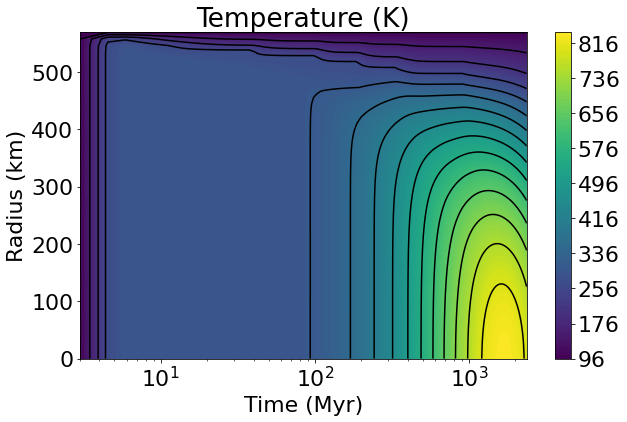

In [9]:
Ceres.plotAttribute("Temp","Temperature (K)")
plt.xscale("log")

In [10]:
print(Ceres.grid[99,45].AqSpec)

{'NH4+': 0.42006, 'HCO3-': 0.39088, 'N2(aq)': 0.05111, 'Methane(aq)': 0.048118, 'Cl-': 0.019239, 'NH3(aq)': 0.0078188, 'CO2(aq)': 0.0056814, 'CO3--': 0.005636, 'Na+': 0.0010039, 'K+': 0.00020101, 'SiO2(aq)': 9.3245e-05, 'MgHCO3+': 7.2725e-05, 'Methionine(aq)': 6.5154e-05, 'Mg++': 5.1675e-05, 'Acetate': 4.6911e-05, 'Acetamide(aq)': 1.8781e-05, 'MgCO3(aq)': 1.8006e-05, 'NH4CH3COO(aq)': 1.2505e-05, 'Formate': 3.1984e-06, 'HSiO3-': 1.3095e-06, 'NaCl(aq)': 1.304e-06, 'Urea(aq)': 1.1259e-06, 'OH-': 1.0946e-06, 'CaHCO3+': 5.8486e-07, 'Ca++': 5.0278e-07, 'CaCO3(aq)': 3.114e-07, 'Ethane(aq)': 2.3017e-07, 'MgCl+': 2.2293e-07, 'Fe++': 2.0177e-07, 'HS-': 1.0758e-07, 'KCl(aq)': 4.3901e-08, 'Propanoate': 2.9852e-08, 'NaHSiO3(aq)': 2.6765e-08, 'Acetic_acid(aq)': 2.2748e-08, 'H+': 1.755e-08, 'NaCH3COO(aq)': 1.6325e-08, 'AlO2-': 1.5582e-08, 'MgCH3COO+': 1.5541e-08, 'H2S(aq)': 9.1098e-09, 'H2(aq)': 3.0278e-09, 'KCH3COO(aq)': 2.0699e-09, 'Na(For)(aq)': 1.5131e-09, 'Mg(For)+': 1.4466e-09, 'FeCl+': 6.5649e

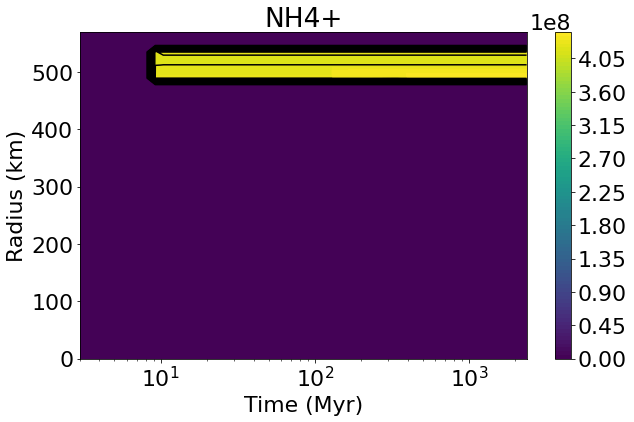

In [11]:
Ceres.plotDictAttribute("AqSpec","NH4+","NH4+",10**9)
plt.xscale("log")

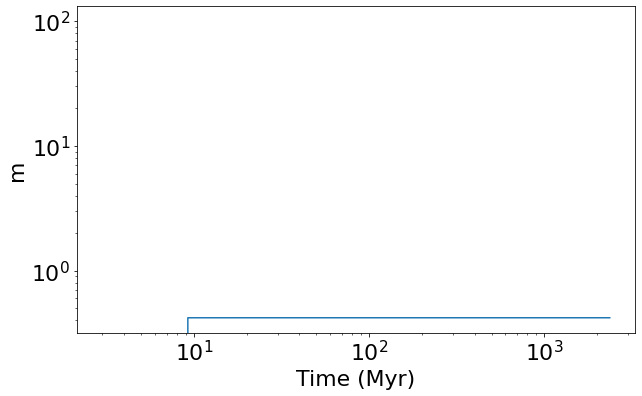

In [12]:
testPlot = Ceres.plotDictAttributeLine("AqSpec","NH4+","m",45,1)
#plt.ylim([10**-2,100])
plt.yscale('log')
plt.xscale('log')

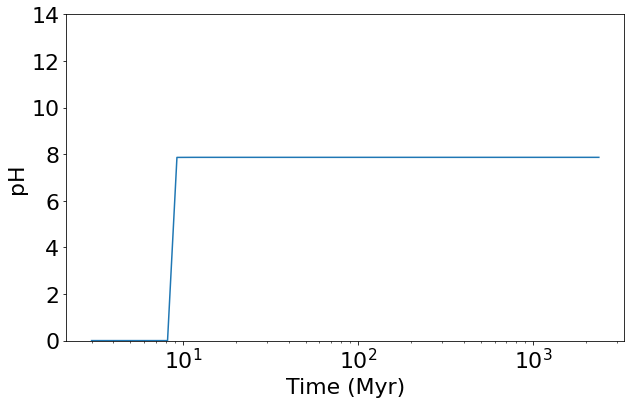

In [13]:
testPlot = Ceres.plotAttributeLine("pH","pH",45)
plt.ylim([0,14])
#plt.yscale('log')
plt.xscale('log')

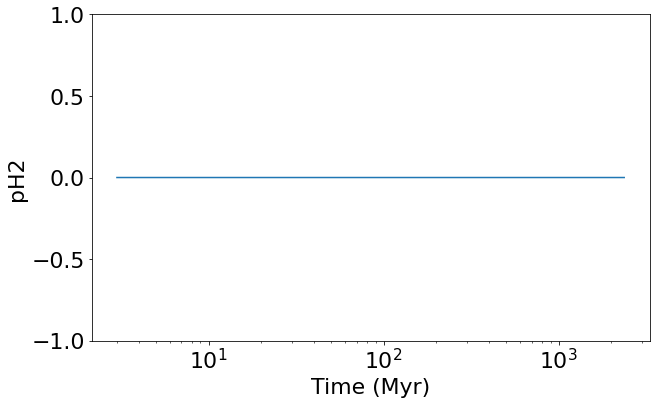

In [40]:
testPlot = Ceres.plotAttributeLine("pH2","pH2",45)
plt.ylim([-1,1])
#plt.yscale('log')
plt.xscale('log')

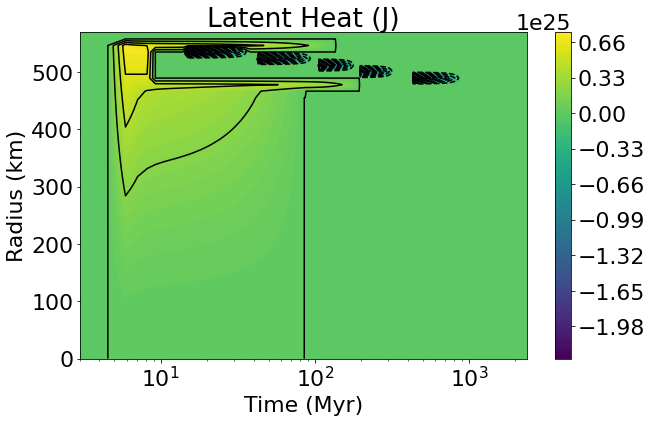

In [14]:
Ceres.plotAttribute("latentHeat","Latent Heat (J)")
plt.xscale("log")

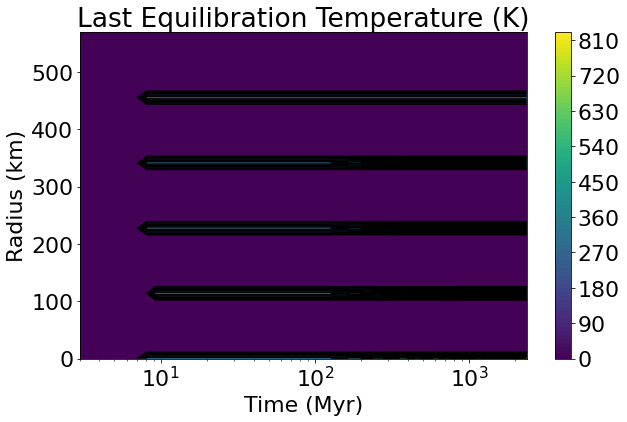

In [15]:
Ceres.plotAttribute("lastEquil","Last Equilibration Temperature (K)")
plt.xscale("log")

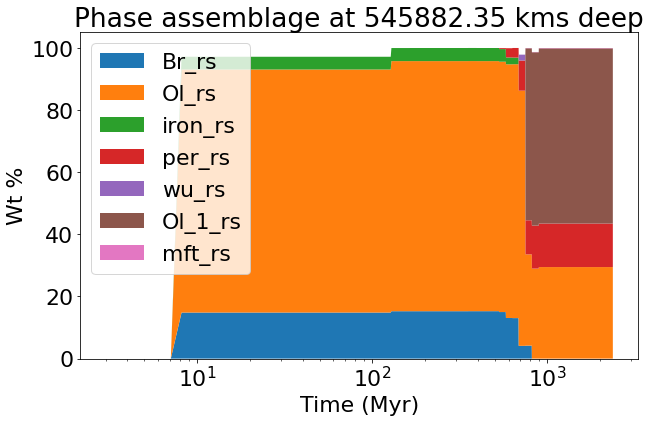

In [16]:
Ceres.plotPhaseAssemblage(3,1)

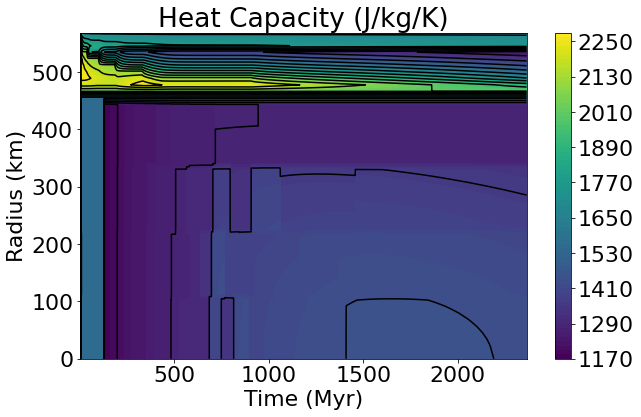

In [17]:
Ceres.plotAttribute("Cp","Heat Capacity (J/kg/K)")

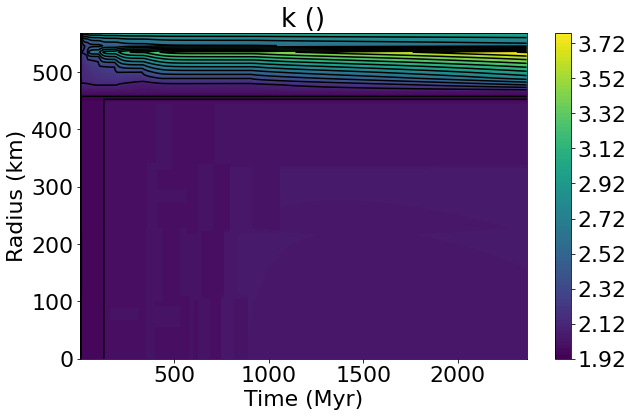

In [18]:
Ceres.plotAttribute("TCond","k ()")

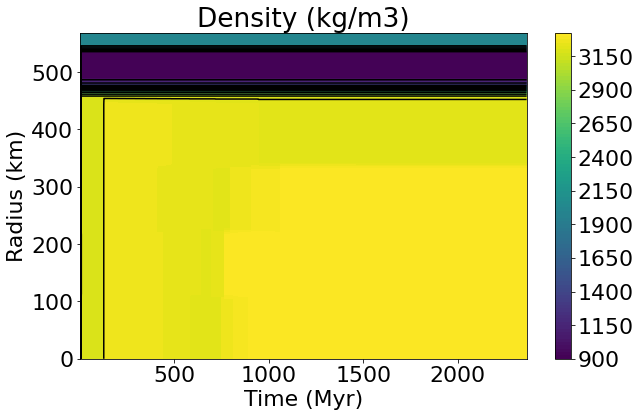

In [19]:
Ceres.plotAttribute("Dens","Density (kg/m3)")

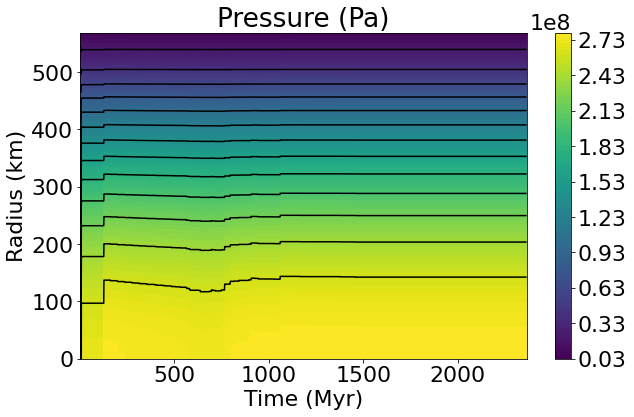

In [20]:
Ceres.plotAttribute("Press","Pressure (Pa)")

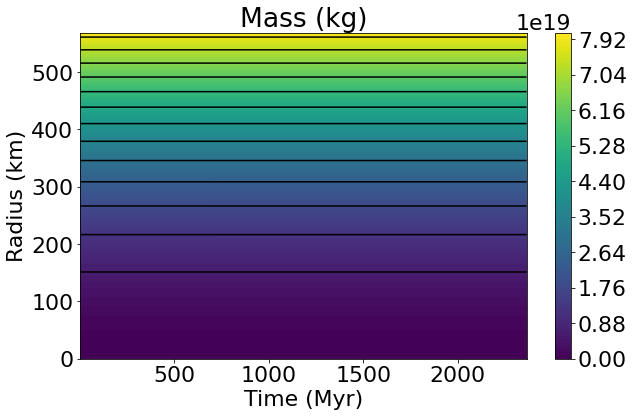

In [21]:
Ceres.plotAttribute("Mass","Mass (kg)")

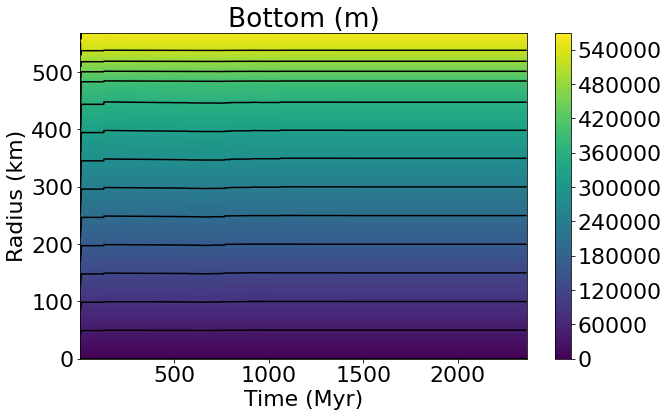

In [22]:
Ceres.plotAttribute("Bot","Bottom (m)")

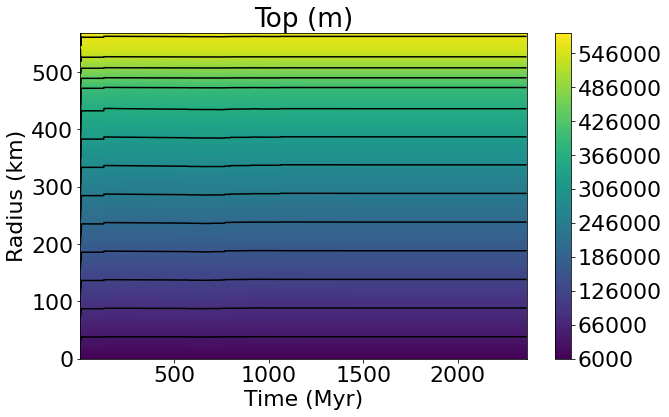

In [23]:
Ceres.plotAttribute("Top","Top (m)")

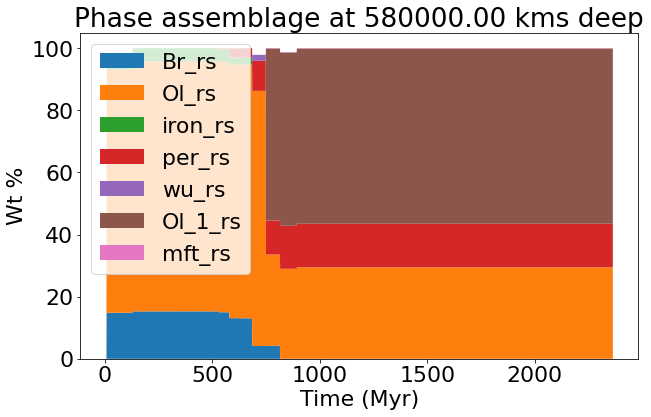

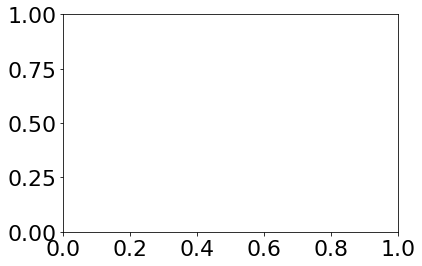

In [24]:
Ceres.plotPhaseAssemblage(0)
ax = plt.gca() #xscale("log")

In [25]:
print(Ceres.grid[199,0].RockPhaseDat[1])

{'mass': 80.52, 'wt%': 80.52, 'vol%': 77.85, 'mol%': 62.76, 'mol': 0.569, 'H': 0.0, 'C': 0.0, 'Mg': 33.817, 'Al': 0.0, 'Si': 19.831, 'S': 0.0, 'Ca': 0.0, 'Fe': 1.163, 'O': 45.189, 'Na': 0.0, 'N': 0.0, 'N(g)': 141.62, 'G(J)': -2151800.0, 'S(J/K)': 211.33, 'V(J/bar)': 4.4149, 'Cp(J/K)': 160.76, 'Alpha(1/K)': 3.6359e-05, 'Beta(1/bar)': 8.0996e-07, 'Cp/Cv': 1.0309, 'Density(kg/m3)': 3207.9, 'Gruneisen_T': 1.2709, 'Ks(bar)': 1272800.0, 'Mu(bar)': 424270.0, 'V0(km/s)': 6.299, 'Vp(km/s)': 7.5705, 'Vs(km/s)': 3.6367, 'Poisson_ratio': 0.35, 'Enthalpy (J/kg)': 0.0, 'Specific Enthalpy (J/m3)': 0.0, 'Entropy (J/K/kg)': 0.0, 'Specific Entropy (J/K/m3)': 0.0, 'Heat Capacity (J/K/kg)': 0.0, 'Specific Heat Capacity (J/K/m3)': 0.0}


In [26]:
#for i in range(0,1500):
#    if not Ceres.grid[i,1].RockPhaseDat:
#        print(Ceres.grid[i,0].RockPhaseDat)
#        print(i)
        
print(Ceres.grid[170,0].RockPhases)
print(Ceres.grid[170,0].RockPhaseDat[1])

['Br_rs' 'Ol_rs' 'iron_rs' 'Bulk_rs']
{'mass': 80.52, 'wt%': 80.52, 'vol%': 77.88, 'mol%': 62.76, 'mol': 0.569, 'H': 0.0, 'C': 0.0, 'Mg': 33.815, 'Al': 0.0, 'Si': 19.831, 'S': 0.0, 'Ca': 0.0, 'Fe': 1.166, 'O': 45.189, 'Na': 0.0, 'N': 0.0, 'N(g)': 141.62, 'G(J)': -2146538.0, 'S(J/K)': 205.23, 'V(J/bar)': 4.4108, 'Cp(J/K)': 159.22, 'Alpha(1/K)': 3.6082e-05, 'Beta(1/bar)': 8.0709e-07, 'Cp/Cv': 1.0296, 'Density(kg/m3)': 3210.8, 'Gruneisen_T': 1.2752, 'Ks(bar)': 1275700.0, 'Mu(bar)': 425240.0, 'V0(km/s)': 6.3033, 'Vp(km/s)': 7.5757, 'Vs(km/s)': 3.6392, 'Poisson_ratio': 0.35, 'Enthalpy (J/kg)': 0.0, 'Specific Enthalpy (J/m3)': 0.0, 'Entropy (J/K/kg)': 0.0, 'Specific Entropy (J/K/m3)': 0.0, 'Heat Capacity (J/K/kg)': 0.0, 'Specific Heat Capacity (J/K/m3)': 0.0}


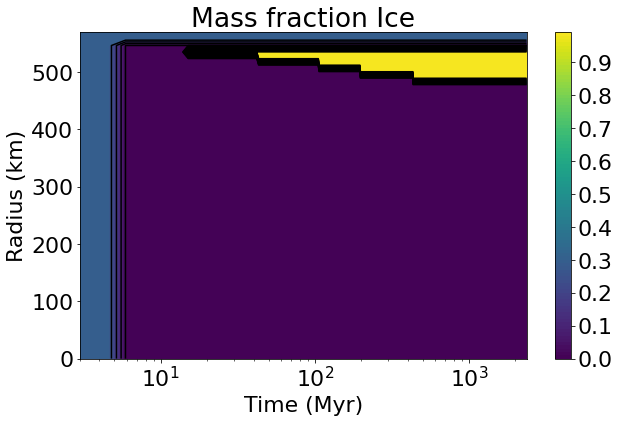

In [27]:
Ceres.plotDictAttributeMassScaled("IceComp","H2O","Mass fraction Ice",0,1)
plt.xscale("log")

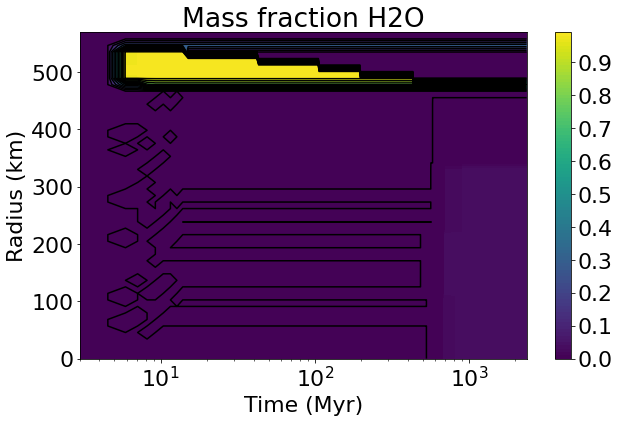

In [28]:
Ceres.plotDictAttributeMassScaled("AqComp","H2O","Mass fraction H2O",0,1)
plt.xscale("log")

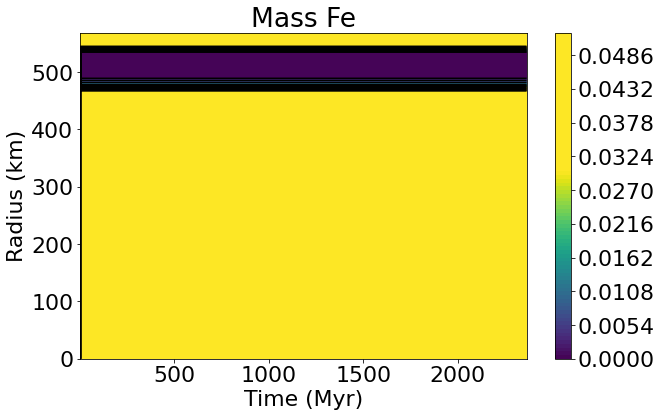

In [29]:
Ceres.plotDictAttributeMassScaled("RockComp","Fe","Mass Fe",0,0.03)

In [30]:
Ceres.grid[199,24].RockMass

1.8863605090602975e+19

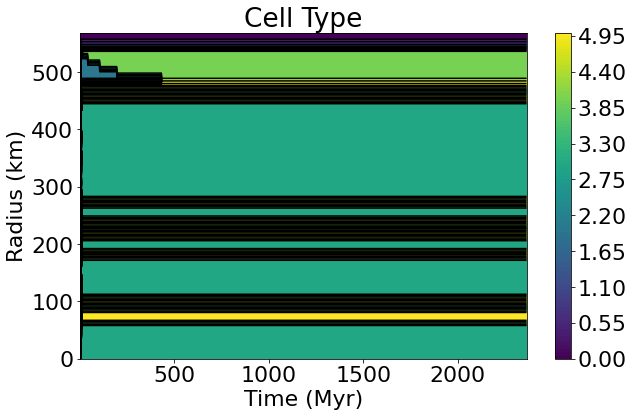

In [31]:
Ceres.plotAttribute("Celltype","Cell Type")

In [32]:
Ceres.grid[199,0].RockPhases

array(['Br_rs', 'Ol_rs', 'iron_rs', 'Bulk_rs'], dtype='<U7')

In [33]:
Ceres.grid[199,0].RockPhaseDat

[{'mass': 15.259999999999998,
  'wt%': 15.26,
  'vol%': 20.42,
  'mol%': 28.86,
  'mol': 0.261,
  'H': 3.453,
  'C': 0.0,
  'Mg': 41.57,
  'Al': 0.0,
  'Si': 0.0,
  'S': 0.0,
  'Ca': 0.0,
  'Fe': 0.156,
  'O': 54.821,
  'Na': 0.0,
  'N': 0.0,
  'N(g)': 58.37,
  'G(J)': -916004.0,
  'S(J/K)': 139.4,
  'V(J/bar)': 2.5174,
  'Cp(J/K)': 107.68,
  'Alpha(1/K)': 8.9514e-05,
  'Beta(1/bar)': 2.7763e-06,
  'Cp/Cv': 1.0473,
  'Density(kg/m3)': 2318.7,
  'Gruneisen_T': 0.78945,
  'Ks(bar)': 377220.0,
  'Mu(bar)': 125740.0,
  'V0(km/s)': 4.0335,
  'Vp(km/s)': 4.8476,
  'Vs(km/s)': 2.3287,
  'Poisson_ratio': 0.35,
  'Enthalpy (J/kg)': 0.0,
  'Specific Enthalpy (J/m3)': 0.0,
  'Entropy (J/K/kg)': 0.0,
  'Specific Entropy (J/K/m3)': 0.0,
  'Heat Capacity (J/K/kg)': 0.0,
  'Specific Heat Capacity (J/K/m3)': 0.0},
 {'mass': 80.52,
  'wt%': 80.52,
  'vol%': 77.85,
  'mol%': 62.76,
  'mol': 0.569,
  'H': 0.0,
  'C': 0.0,
  'Mg': 33.817,
  'Al': 0.0,
  'Si': 19.831,
  'S': 0.0,
  'Ca': 0.0,
  'Fe': 1.163

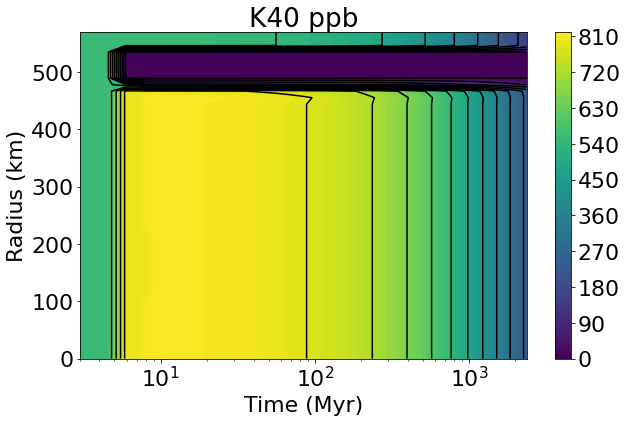

In [34]:
Ceres.plotDictAttribute("RIComp","K40","K40 ppb",10**9)
plt.xscale("log")

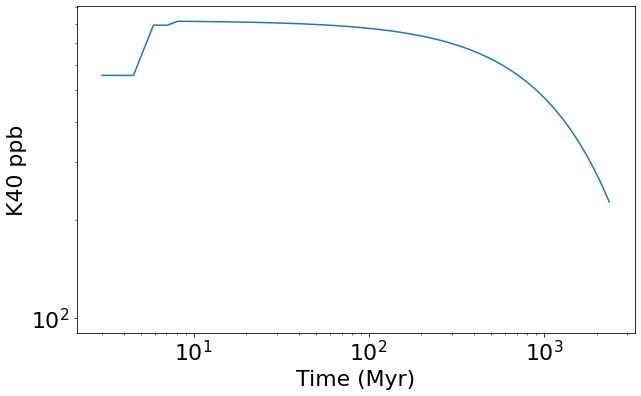

In [35]:
testPlot = Ceres.plotDictAttributeLine("RIComp","K40","K40 ppb",0,10**9)
#plt.xlim([2,12])
plt.yscale('log')
plt.xscale('log')

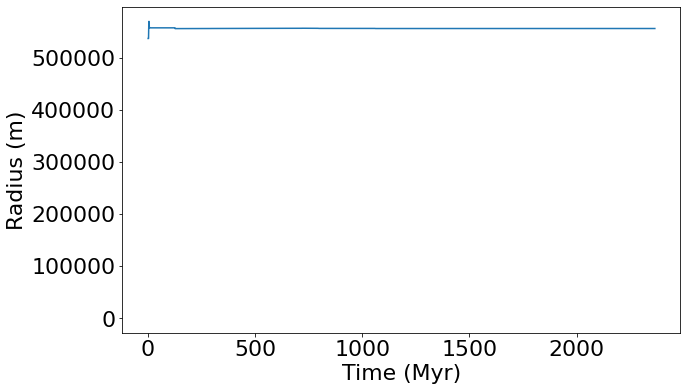

In [36]:
Ceres.plotAttributeLine("Top","Radius (m)",49)
#plt.xlim([2,12])

<Figure size 432x288 with 0 Axes>

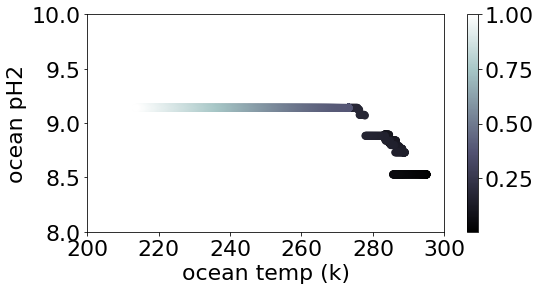

In [80]:
ts = Ceres.times
nt=len(ts)
oceanT=np.zeros(nt)
oceanpH2=np.zeros(nt)
for i in range(0,nt):
    oceanT[i]=Ceres.grid[i,43].Temp
    if "H2(aq)" in Ceres.grid[i,43].AqSpec:
        oceanpH2[i]=-np.log10(Ceres.grid[i,43].AqSpec["H2(aq)"])
    else:
        oceanpH2[i]=np.nan

plt.set_cmap('bone')
plt.figure(figsize=(8,4))
cts=ts/np.max(ts)    
plt.scatter(oceanT,oceanpH2,50,c=cts)
plt.xlim([200,300])
plt.ylim([8,10])
#plt.plot(ts,oceanT)

plt.xlabel('ocean temp (k)')
plt.ylabel('ocean pH2')
plt.colorbar()

In [68]:
Ceres.grid[1000,43].AqSpec["H2(aq)"]

7.2472e-10

In [37]:
H=1.0
C=12.01
N=14.01
O=16
Na=22.99
Mg=24.31
Al=26.98
Si=28.09
S=32.07
Cl=35.45
K=39.10
Ca=40.08
Mn=54.94
Fe=55.85
Ni=58.69